Accuracy: 0.84
Confusion Matrix:
[[1835  188]
 [ 234  334]]


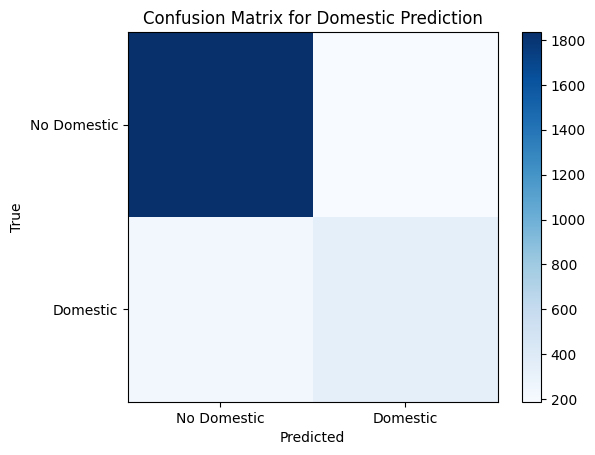

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('2020_crimes.csv', low_memory = False)

# Drop rows with missing values
df.dropna(subset=['Domestic'], inplace=True)

# Convert Arrest column to boolean
df['Domestic'] = df['Domestic'].astype(bool)
df['Hour'] = pd.to_datetime(df['Date']).dt.hour

# Select relevant columns as features
features = ['Hour', 'Description', 'Location Description', 'Community Area']
X = df[features]
 
# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

# Target variable
y = df['Domestic']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Train a logistic regression model
clf = DecisionTreeClassifier(random_state=35)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

# Plotting the Confusion Matrix
labels = ['No Domestic', 'Domestic']
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0, 1], yticks=[0, 1], xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix for Domestic Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()